Importation des librairy qui vont bien pour les svm

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from numpy.random import seed
from numpy.random import randn
import pandas as pd 
import seaborn as sns

Création des données

In [4]:
nbapp=400
nbtest=10000



g=np.random.uniform(0,1,(nbapp,1))
xdep1=randn(nbapp,2)
mask=g<0.2
xdep1[mask[:,0],:]=xdep1[mask[:,0],:]*[1,1]+[2,2]
mask=np.all([g>=0.1,g<0.7],axis=0)
xdep1[mask[:,0],:]=xdep1[mask[:,0],:]*3+[-3,4]
mask=g>=0.7
xdep1[mask[:,0],:]=xdep1[mask[:,0],:]*[1,3]+[1,2]


g=np.random.uniform(0,1,(nbapp,1))
xdep2=randn(nbapp,2)
mask=g<0.2
xdep2[mask[:,0],:]=xdep2[mask[:,0],:]*[1.5,1]+[4,1]
mask=np.all([g>=0.2,g<0.7],axis=0)
xdep2[mask[:,0],:]=xdep2[mask[:,0],:]*[1.5,2.5]+[-2,-3]
mask=np.all([g>=0.7],axis=0)
xdep2[mask[:,0],:]=xdep2[mask[:,0],:]*[1.5,1.5]+[-3,-1]
Xapp=np.concatenate((xdep1, xdep2), axis=0)
un=np.ones(nbapp)
Lapp=np.concatenate((un, -un), axis=0)


g=np.random.uniform(0,1,(nbtest,1))
xdep1=randn(nbtest,2)
mask=g<0.2
xdep1[mask[:,0],:]=xdep1[mask[:,0],:]*[1,1]+[2,2]
mask=np.all([g>=0.2,g<0.7],axis=0)
xdep1[mask[:,0],:]=xdep1[mask[:,0],:]*3+[-3,4]
mask=g>=0.7
xdep1[mask[:,0],:]=xdep1[mask[:,0],:]*[1,3]+[1,2]


g=np.random.uniform(0,1,(nbtest,1))
xdep2=randn(nbtest,2)
mask=g<0.2
xdep2[mask[:,0],:]=xdep2[mask[:,0],:]*[1.5,1]+[4,1]
mask=np.all([g>=0.2,g<0.7],axis=0)
xdep2[mask[:,0],:]=xdep2[mask[:,0],:]*[2,2.5]+[-2,-3]
mask=np.all([g>=0.7],axis=0)
xdep2[mask[:,0],:]=xdep2[mask[:,0],:]*[1.5,1.5]+[-3,-1]
Xtest=np.concatenate((xdep1, xdep2), axis=0)
un=np.ones(nbtest)
Ltest=np.concatenate((un, -un), axis=0)

Affichage des données d'apprentissage

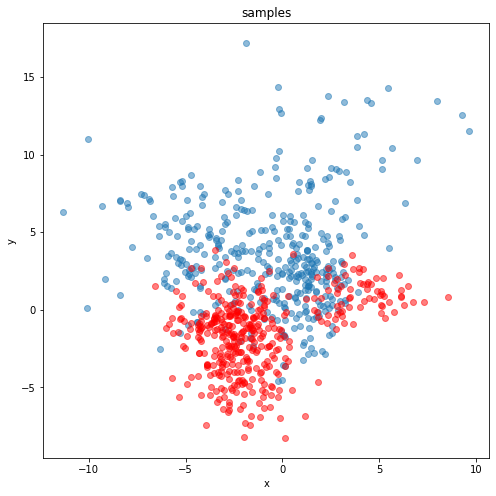

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(Xapp[0:nbapp-1,0],Xapp[0:nbapp-1:,1],alpha=0.5)
plt.scatter(Xapp[nbapp:2*nbapp-1,0],Xapp[nbapp:2*nbapp-1:,1],c='r',alpha=0.5)
plt.xlabel('x')  
plt.ylabel('y')  
  
# displaying the title 
plt.title("samples") 
plt.show()

Apprentissage

In [6]:
#classifier = svm.SVC(kernel='linear',C=10)
#classifier = svm.SVC(kernel='poly',degree=11,C=1)
classifier = svm.SVC(kernel='rbf',gamma=0.1,C=10)
classifier.fit(Xapp, Lapp)
y_app_pred = classifier.decision_function(Xapp)
lab_app_pred = np.sign(y_app_pred)
y_test_pred = classifier.decision_function(Xtest)
lab_test_pred = np.sign(y_test_pred)

eval_app=lab_app_pred-Lapp
eval_test=lab_test_pred-Ltest



Evaluation des perfromances

In [7]:
[sum(abs(eval_app))/nbapp/2/2,sum(abs(eval_test))/nbtest/2/2]

[0.11125, 0.1323]

Parcours d'une grille 2D pour affichage de la valeur de la fonction SVM

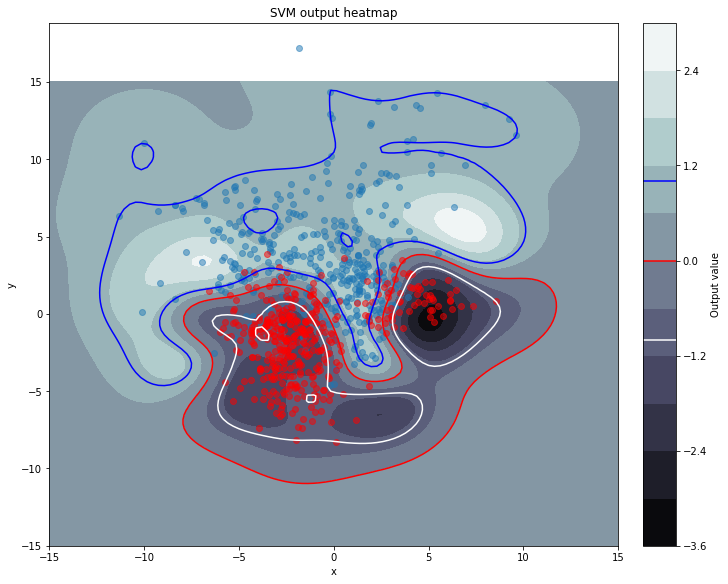

In [19]:
BX=15 
origin = 'lower'
nbs=100
delta=(2*BX)/(nbs-1)
x = y = np.arange(-BX, BX+0.0001, delta)
X, Y = np.meshgrid(x, y)
Xr=np.reshape(X,(nbs*nbs,1))
Yr=np.reshape(Y,(nbs*nbs,1))
Xmap=np.concatenate((Xr, Yr), axis=1)
Ymapr = classifier.decision_function(Xmap)
Ymap=np.reshape(Ymapr,(nbs,nbs))
Ymap.shape



fig1, ax1 = plt.subplots(constrained_layout=True,figsize=(10,8))
#fig1, ax1 = plt.subplots(constrained_layout=True)
CS = ax1.contourf(X, Y, Ymap, 10, cmap=plt.cm.bone, origin=origin)
ax1.set_title('SVM output heatmap')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

#CS2 = ax1.contour(CS, levels=CS.levels[::1], colors='r', origin=origin)
CS2 = ax1.contour(CS, levels=(-1,0,1), colors=('w','r','b'), origin=origin)
# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('Output value')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

ax1.scatter(Xapp[0:nbapp-1,0],Xapp[0:nbapp-1,1],alpha=0.5)
ax1.scatter(Xapp[nbapp:2*nbapp-1,0],Xapp[nbapp:2*nbapp-1,1],c='r',alpha=0.5)

plt.show()

Evaluation de l'AUC

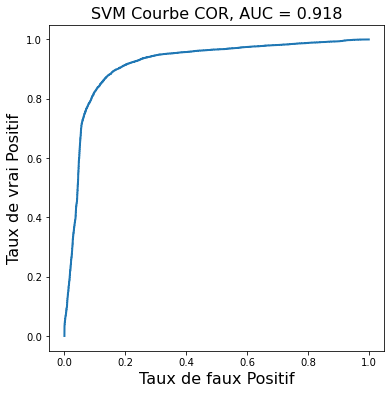

In [9]:
from sklearn import metrics
fpr, tpr, thr = metrics.roc_curve(Ltest,y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='Lineaire, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('Taux de faux Positif', fontsize=16)
plt.ylabel('Taux de vrai Positif', fontsize=16)
plt.title('SVM Courbe COR, AUC = %.3f'%auc, fontsize=16)

# afficher l'image
plt.show()

Calcul des distributions

In [10]:
x = y = np.arange(-BX, BX+0.0001, delta)
X, Y = np.meshgrid(x, y)
sigx=1**2
sigy=1**2
mx=2
my=2
D1ax=1/math.sqrt(2*math.pi*sigx)*np.exp(-(1/(2*sigx)*(X-mx)**2))
D1ay=1/math.sqrt(2*math.pi*sigy)*np.exp(-(1/(2*sigy)*(Y-my)**2))
D1a=D1ax*D1ay

sigx=3**2
sigy=3**2
mx=-3
my=4
D2ax=1/math.sqrt(2*math.pi*sigx)*np.exp(-(1/(2*sigx)*(X-mx)**2))
D2ay=1/math.sqrt(2*math.pi*sigy)*np.exp(-(1/(2*sigy)*(Y-my)**2))
D2a=D2ax*D2ay


sigx=1**2
sigy=3**2
mx=1
my=2
D3ax=1/math.sqrt(2*math.pi*sigx)*np.exp(-(1/(2*sigx)*(X-mx)**2))
D3ay=1/math.sqrt(2*math.pi*sigy)*np.exp(-(1/(2*sigy)*(Y-my)**2))
D3a=D3ax*D3ay

Da=0.2*D1a+0.5*D2a+0.3*D3a

sigx=1.5**2
sigy=1**2
mx=4
my=1
D1ax=1/math.sqrt(2*math.pi*sigx)*np.exp(-(1/(2*sigx)*(X-mx)**2))
D1ay=1/math.sqrt(2*math.pi*sigy)*np.exp(-(1/(2*sigy)*(Y-my)**2))
D1b=D1ax*D1ay

sigx=1.5**2
sigy=2.5**2
mx=-2
my=-3
D2ax=1/math.sqrt(2*math.pi*sigx)*np.exp(-(1/(2*sigx)*(X-mx)**2))
D2ay=1/math.sqrt(2*math.pi*sigy)*np.exp(-(1/(2*sigy)*(Y-my)**2))
D2b=D2ax*D2ay


sigx=1.5**2
sigy=1.5**2
mx=-3
my=-1
D3ax=1/math.sqrt(2*math.pi*sigx)*np.exp(-(1/(2*sigx)*(X-mx)**2))
D3ay=1/math.sqrt(2*math.pi*sigy)*np.exp(-(1/(2*sigy)*(Y-my)**2))
D3b=D3ax*D3ay

Db=0.2*D1b+0.5*D2b+0.3*D3b
RV=Da/Db


Tracé du classifieur de Bayes

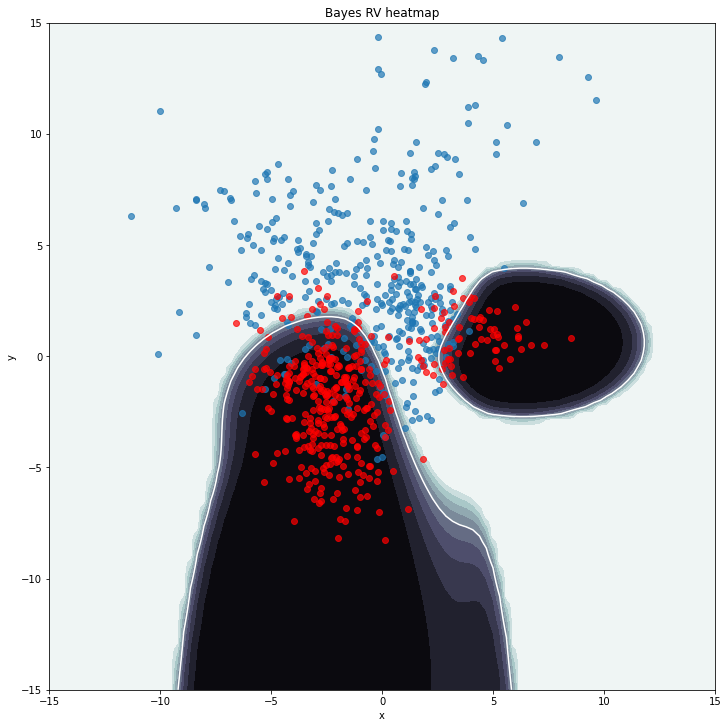

In [21]:
fig1, ax1 = plt.subplots(constrained_layout=True,figsize=(10,10))
#fig1, ax1 = plt.subplots(constrained_layout=True)
RVm=np.maximum(RV,0.1)
RVm=np.minimum(RVm,1.9)
CS = ax1.contourf(X, Y, RVm, 10, cmap=plt.cm.bone, origin=origin)
ax1.set_title('Bayes RV heatmap')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

#CS2 = ax1.contour(CS, levels=CS.levels[::1], colors='r', origin=origin)
CS2 = ax1.contour(CS, levels=(-1,0,1), colors='w', origin=origin)
# Make a colorbar for the ContourSet returned by the contourf call.
#cbar = fig1.colorbar(CS)
#cbar.ax.set_ylabel('Output value')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)

ax1.scatter(Xapp[0:nbapp-1,0],Xapp[0:nbapp-1,1],alpha=0.7)
ax1.scatter(Xapp[nbapp:2*nbapp-1,0],Xapp[nbapp:2*nbapp-1,1],c='r',alpha=0.7)

ax1.set_xlim([-BX,BX])
ax1.set_ylim([-BX,BX])
plt.show()